In [19]:
import numpy as np
import cv2
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [20]:
data=pd.read_csv(r'C:\Users\soumya\OneDrive\Desktop\Airlines.csv')

In [21]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [23]:
data.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [24]:
le=LabelEncoder()
data['Airline']=le.fit_transform(data['Airline'])
data['AirportFrom']=le.fit_transform(data['AirportFrom'])
data['AirportTo']=le.fit_transform(data['AirportTo'])

In [25]:
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,4,178,203,264,5,1439,326,0
539379,539380,8,398,252,16,5,1439,305,0
539380,539381,8,609,253,184,5,1439,255,0
539381,539382,13,78,128,253,5,1439,313,1


In [26]:
data.corr()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,1.000000,0.001513,-0.006156,0.006146,0.008210,-0.055474,0.029156,0.020781,0.139762
Airline,0.001513,1.000000,0.095285,0.098237,0.098791,-0.007258,0.004381,-0.207061,0.066936
Flight,-0.006156,0.095285,1.000000,-0.021802,-0.022072,0.000416,-0.005750,-0.341481,-0.046175
AirportFrom,0.006146,0.098237,-0.021802,1.000000,0.015139,0.003732,-0.031555,0.049698,0.018459
AirportTo,0.008210,0.098791,-0.022072,0.015139,1.000000,0.003846,0.030599,0.086982,0.047990
DayOfWeek,-0.055474,-0.007258,0.000416,0.003732,0.003846,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,0.004381,-0.005750,-0.031555,0.030599,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.207061,-0.341481,0.049698,0.086982,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,0.066936,-0.046175,0.018459,0.047990,-0.026199,0.150454,0.040489,1.000000


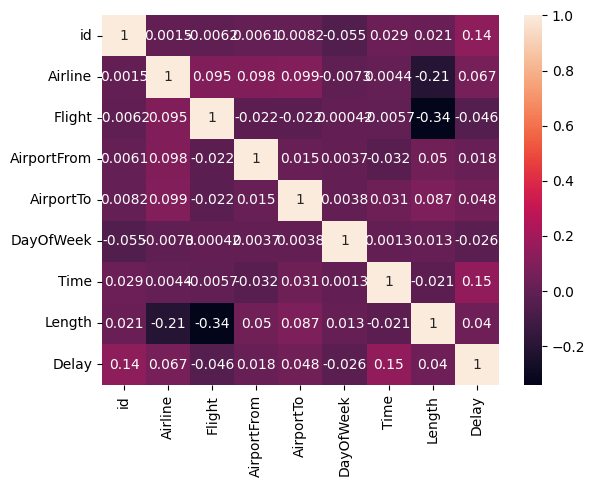

In [27]:
data_heatmap=sns.heatmap(data.corr(), annot=True)

Dropping DayOfWeek & Flight as they are -ve

In [28]:
multiple_model=smf.ols('Delay ~ Airline + Flight + AirportFrom + AirportTo + DayOfWeek + Time + Length',data=data).fit()
print(multiple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Delay   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2668.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:08:49   Log-Likelihood:            -3.7907e+05
No. Observations:              539383   AIC:                         7.582e+05
Df Residuals:                  539375   BIC:                         7.582e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1329      0.004     36.533      

In [29]:
data.drop(['Flight', 'DayOfWeek','id'],axis=1,inplace=True)
data

,Airline,AirportFrom,AirportTo,Time,Length,Delay
0,4,253,135,15,205,1
1,14,217,60,15,222,1
2,1,154,80,20,165,1
3,1,253,80,20,195,1
4,2,14,252,30,202,0
...,...,...,...,...,...,...
539378,4,203,264,1439,326,0
539379,8,252,16,1439,305,0
539380,8,253,184,1439,255,0
539381,13,128,253,1439,313,1


In [30]:
X=data[['Airline']]  #independent
y=data['Delay']      #dependent

In [31]:
#adding constant to independent var-> Airline for the intercept term
X=sm.add_constant(X)

In [32]:
linear_model=sm.OLS(y,X).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Delay   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2428.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:08:49   Log-Likelihood:            -3.8704e+05
No. Observations:              539383   AIC:                         7.741e+05
Df Residuals:                  539381   BIC:                         7.741e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3869      0.001    283.188      0.0

In [33]:
r_squared=linear_model.rsquared  #verification
print('R-squared: ',r_squared)

R-squared:  0.004480372619634965


In [34]:
coefficients=linear_model.params
print('Coefficients: ',coefficients)
#some positive relationship between the 'Airline' and the delay, meaning certain airlines tend to have slightly longer delays compared to others, all else being equal.  

Coefficients:  const      0.386920
Airline    0.006269
dtype: float64


In [35]:
revised_multiple_model=smf.ols('Delay ~ Airline + AirportFrom + AirportTo + Time + Length',data=data).fit()
print(revised_multiple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Delay   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:08:50   Log-Likelihood:            -3.7960e+05
No. Observations:              539383   AIC:                         7.592e+05
Df Residuals:                  539377   BIC:                         7.593e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0734      0.003     23.404      

In [36]:
# dt_df = data[['Airline','Delay']].groupby('Airline').agg('count').reset_index()
# fig = sns.bar(dt_df, x='Airline', y='Delay',template = 'plotly_dark')
# fig.show()

different_airline=data["Airline"].unique()
num_of_different_airline=data["Airline"].nunique()
print("Different airline name: ",str(different_airline))
print("Total number of airlines are: ",num_of_different_airline)


Different airline name:  [ 4 14  1  2  5  3  9 12  0 11  6 16 17 13 10  8  7 15]
Total number of airlines are:  18


Important Features for predicting Delay Include--> Airline, AirportTo, Time, Length

These features align with both statistical significance and practical relevance.
